In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [7]:
#Build a simple data set with y = x + random
nPoints = 100
#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]
#x needs to be list of lists.
x = [[s] for s in xPlot]
#y (labels) has random noise added to x-value
#set seed
np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in xPlot]

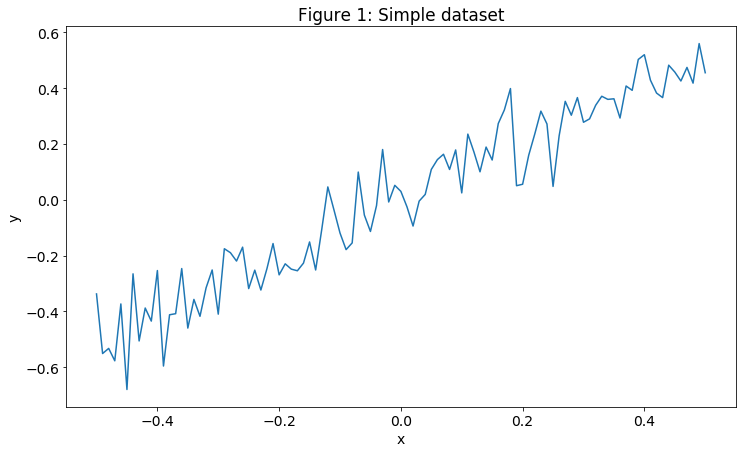

In [8]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (12.0, 7.0)
plt.plot(xPlot,y)
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 1: Simple dataset')
plt.show()

In [14]:
tree = DecisionTreeRegressor(max_depth=2)

In [15]:
tree.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

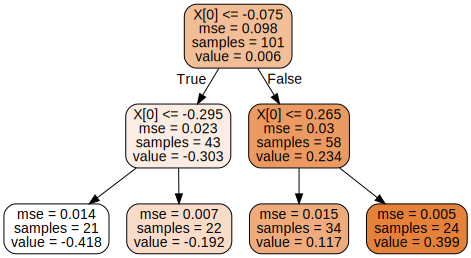

In [17]:
dot_data = export_graphviz(tree,out_file = None,rounded = True,filled = True)
graph = graphviz.Source(dot_data)
graph.render() 
graph

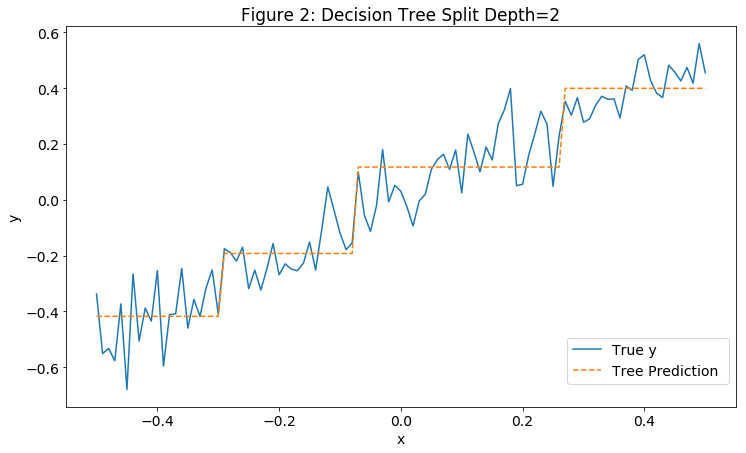

In [25]:
#compare prediction from tree with true values
yHat = tree.predict(x)
plt.figure()
plt.plot(xPlot, y, label='True y')
plt.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--');
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 2: Decision Tree Split Depth=2')
plt.show()